# Data Visualization

## Data Preprocessing

In [139]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
# df['Sex'] = df['Sex'].astype('category').cat.codes
# df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Age'].fillna(df['Age'].median(), inplace=True)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df.drop(to_drop, axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## Data Visualization

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

sns.set(style='whitegrid', context='notebook')

### Line Plot

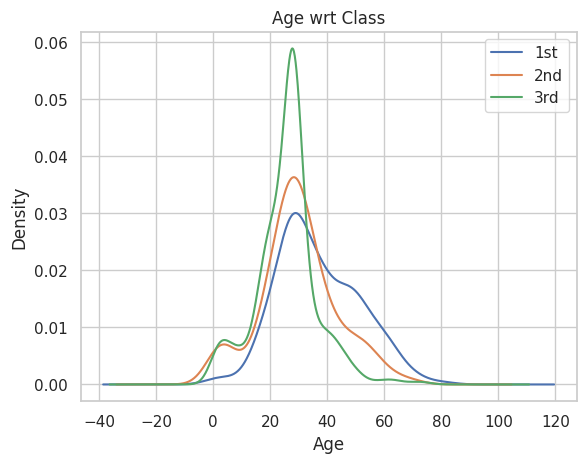

In [145]:
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind="kde")
    plt.xlabel("Age")
    plt.title("Age wrt Class")
    plt.legend(("1st", "2nd", "3rd"))

plt.show()

### Bar plots

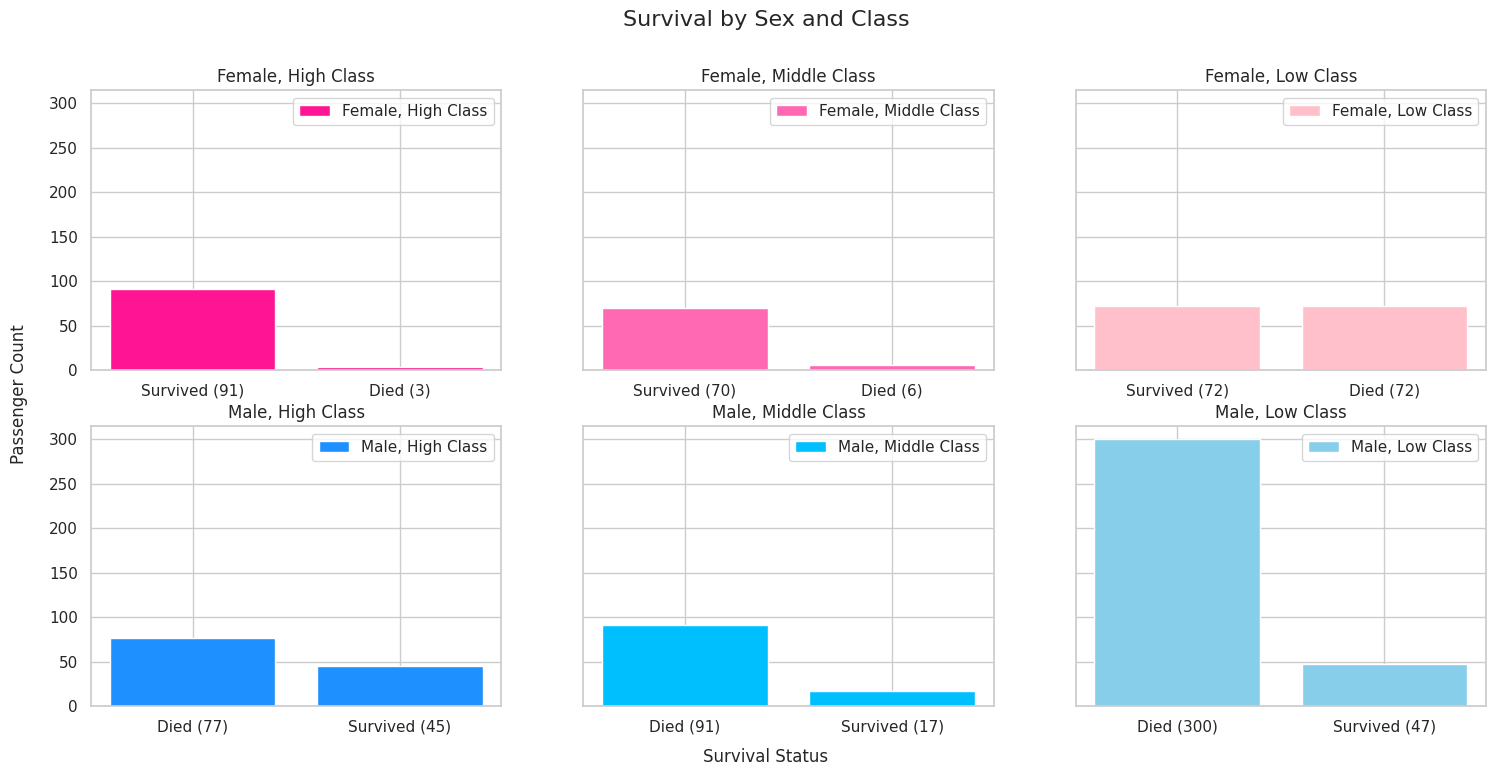

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

colors = ['deeppink', 'hotpink', 'pink',
          'dodgerblue', 'deepskyblue', 'skyblue']
labels = ['Female, High Class', 'Female, Middle Class', 'Female, Low Class',
          'Male, High Class', 'Male, Middle Class', 'Male, Low Class']

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        pclass = 1 if j == 0 else 2 if j == 1 else 3
        sex = 'female' if i == 0 else 'male'
        data = df.Survived[df.Sex == sex][df.Pclass == pclass].value_counts()
        x_labels = [f'{"Survived" if k == 1 else "Died"} ({v})' for k, v in data.to_dict().items()]

        ax.bar(x_labels, data, color=colors[i*3+j], label=labels[i*3+j])
        ax.set_title(labels[i*3+j])
        ax.legend()

fig.text(0.5, 0.04, 'Survival Status', ha='center')
fig.text(0.08, 0.5, 'Passenger Count', va='center', rotation='vertical')
fig.suptitle('Survival by Sex and Class', fontsize=16)

plt.show()

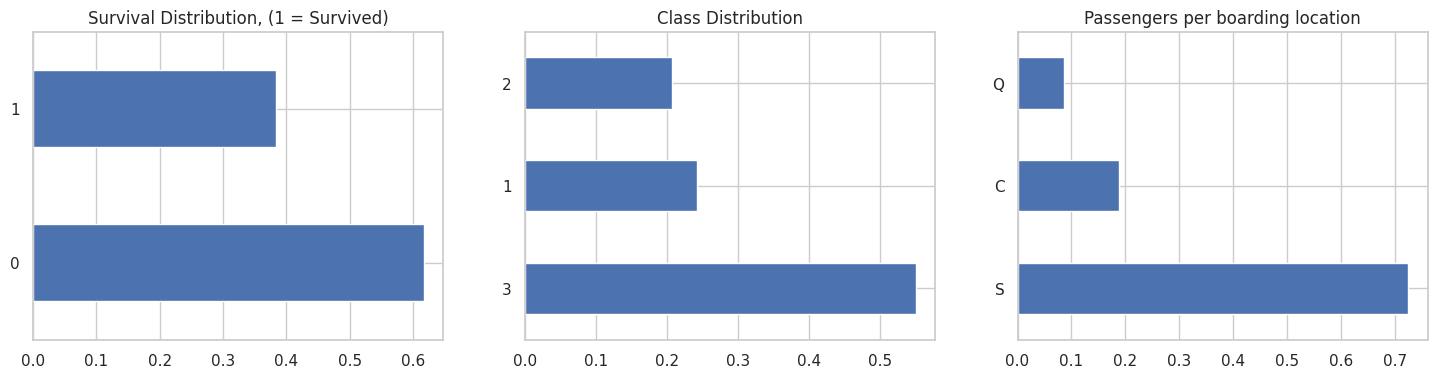

In [147]:
fig = plt.figure(figsize=(18, 4))

plt.subplot2grid((1, 3), (0, 0))
df.Survived.value_counts(normalize=True).plot(kind='barh')
plt.title("Survival Distribution, (1 = Survived)")

plt.subplot2grid((1, 3), (0, 1))
df.Pclass.value_counts(normalize=True).plot(kind='barh')
plt.title("Class Distribution")

plt.subplot2grid((1, 3), (0, 2))
df.Embarked.value_counts(normalize=True).plot(kind='barh')
plt.title("Passengers per boarding location")

plt.show()

### Scatter Plots

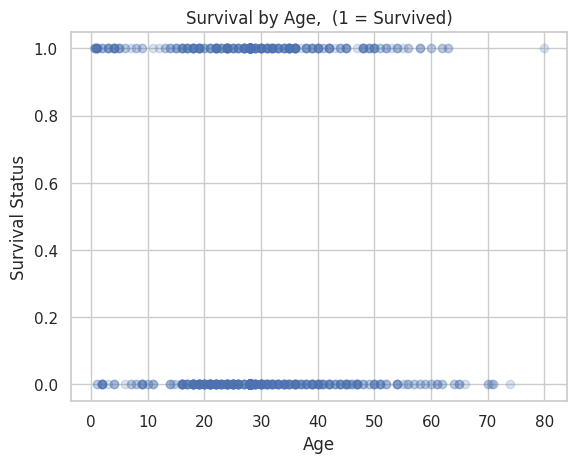

In [148]:
plt.scatter(df['Age'], df['Survived'], alpha=0.2)
plt.title("Survival by Age,  (1 = Survived)")
plt.xlabel("Age")
plt.ylabel("Survival Status")
plt.show()

In [149]:
fig = px.scatter(df, x='Fare', y='Age', color='Survived', size='Fare')
fig.update_layout(title_text="Fare vs Age by Survival Status")
fig.update_xaxes(range=[0, 550])
fig.update_yaxes(range=[0, 80])
fig.show()

### Error bars

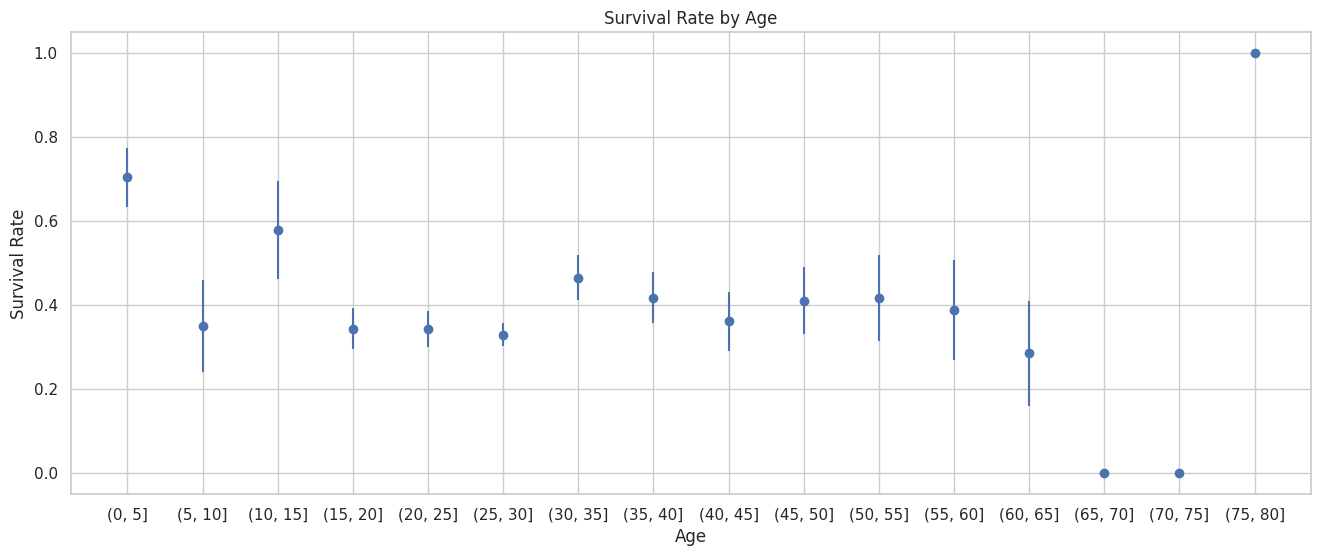

In [150]:
age_bins = pd.cut(df['Age'], bins=range(0, 81, 5))
survival_rate = df.groupby(age_bins)['Survived'].mean()
sem = df.groupby(age_bins)['Survived'].sem()

fig, ax = plt.subplots(figsize=(16, 6))
ax.errorbar(survival_rate.index.astype('str'), survival_rate, sem, fmt='o')
ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Age')
plt.show()

### Contour Plot

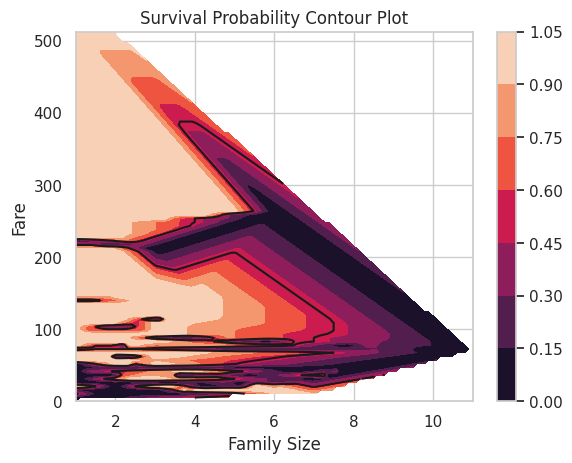

In [151]:
from scipy.interpolate import griddata

x = df['FamilySize']
y = df['Fare']
z = df['Survived']

x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)

points = np.column_stack((x, y))
Z = griddata(points, z, (X, Y), method='linear')

plt.contour(X, Y, Z, levels=[0.5], colors='k')
plt.contourf(X, Y, Z)

plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.title('Survival Probability Contour Plot')
plt.colorbar()

plt.show()

### Histograms

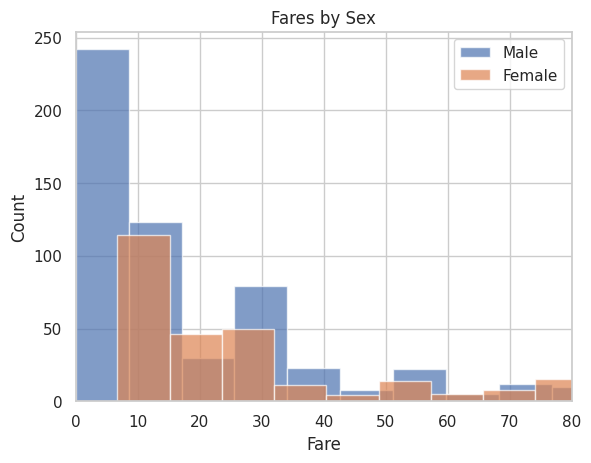

In [152]:
female_ages = df[df['Sex'] == 'female']['Fare']
male_ages = df[df['Sex'] == 'male']['Fare']

plt.hist(male_ages, alpha=0.7, bins=60)
plt.hist(female_ages, alpha=0.7, bins=60)
plt.xlim(0, 80)
plt.legend(['Male', 'Female'])
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fares by Sex')
plt.show()

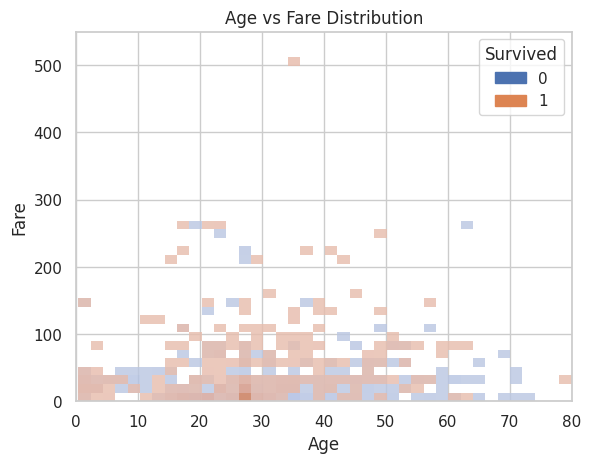

In [153]:
sns.histplot(x="Age", y="Fare", data=df, hue="Survived", bins=40, alpha=0.8)
plt.xlim(0, 80)
plt.ylim(0, 550)
plt.title('Age vs Fare Distribution')
plt.show()

### KDE Plots

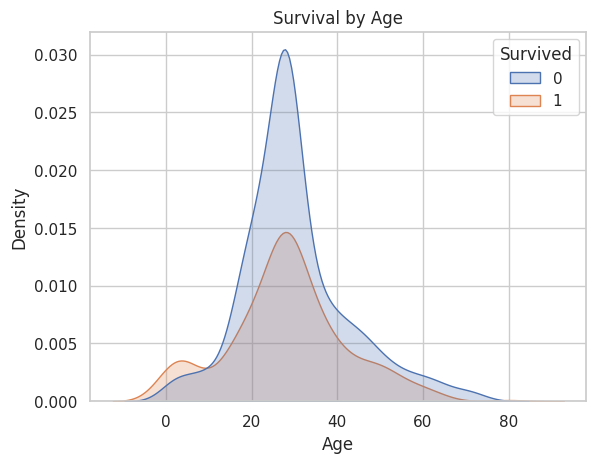

In [154]:
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)
plt.title('Survival by Age')
plt.show()

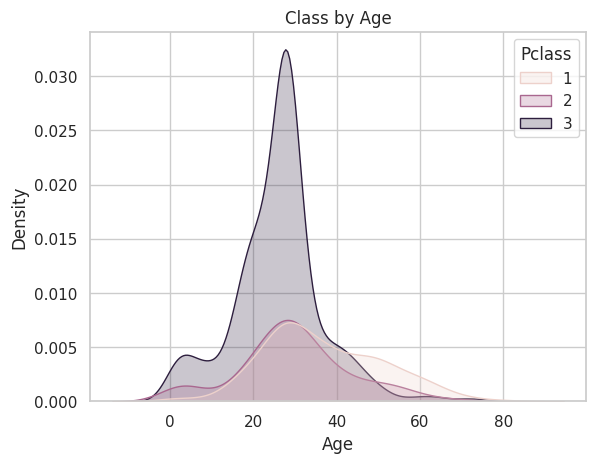

In [155]:
sns.kdeplot(data=df, x="Age", hue="Pclass", fill=True)
plt.title('Class by Age')
plt.show()

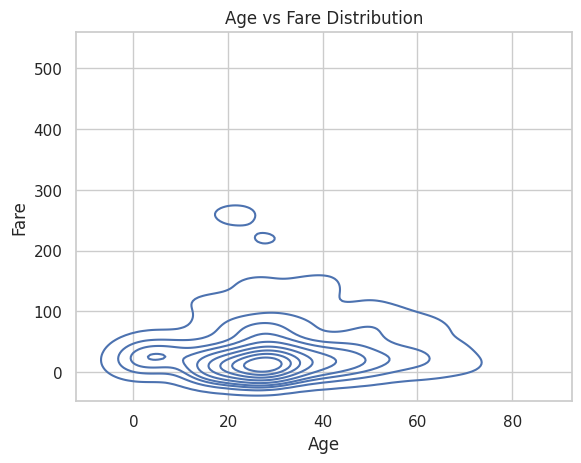

In [156]:
sns.kdeplot(x=df['Age'], y=df['Fare'])
plt.title('Age vs Fare Distribution')
plt.show()

### Joint Plots

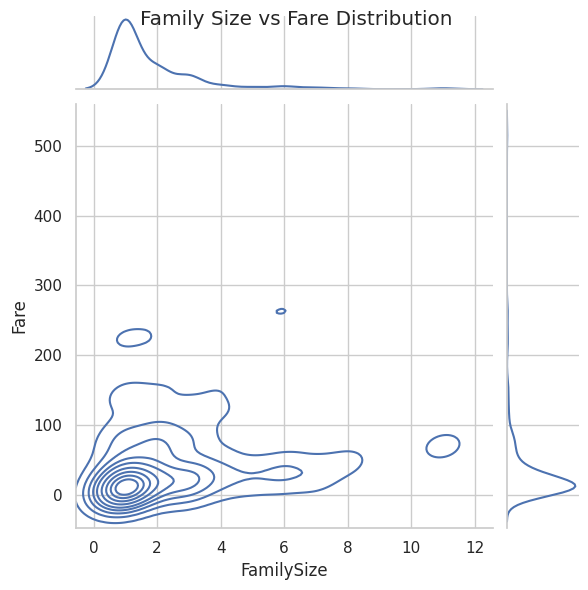

In [157]:
sns.jointplot(x=df['FamilySize'], y=df['Fare'], kind='kde')
plt.suptitle('Family Size vs Fare Distribution')
plt.show()

### Box Plot

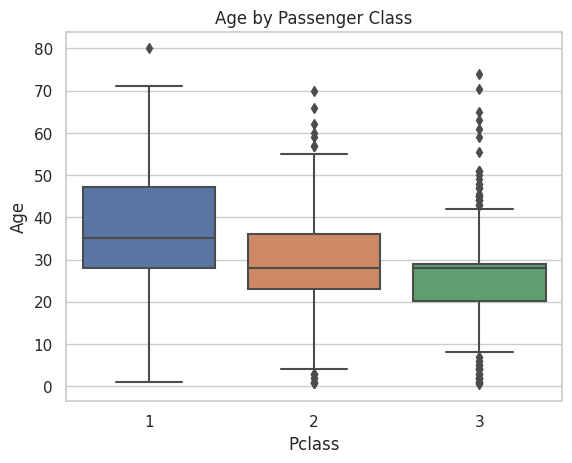

In [158]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Passenger Class')
plt.show()

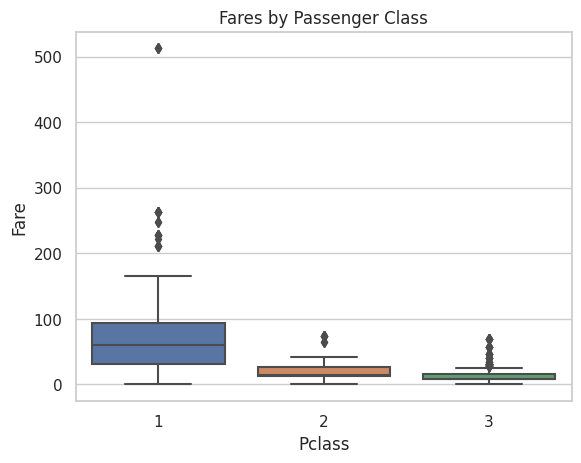

In [159]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fares by Passenger Class')
plt.show()

### Violin Plot

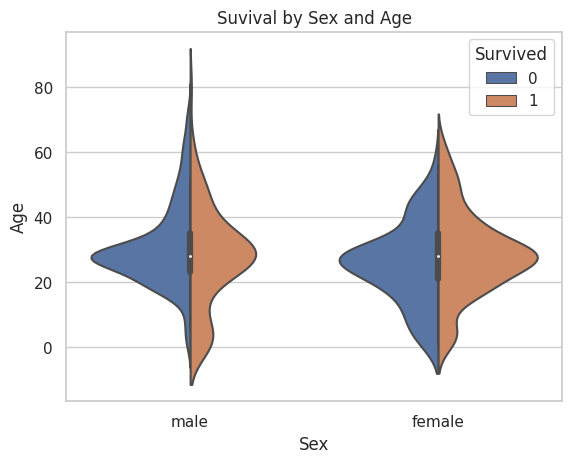

In [160]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title('Suvival by Sex and Age')
plt.show()

### Implot

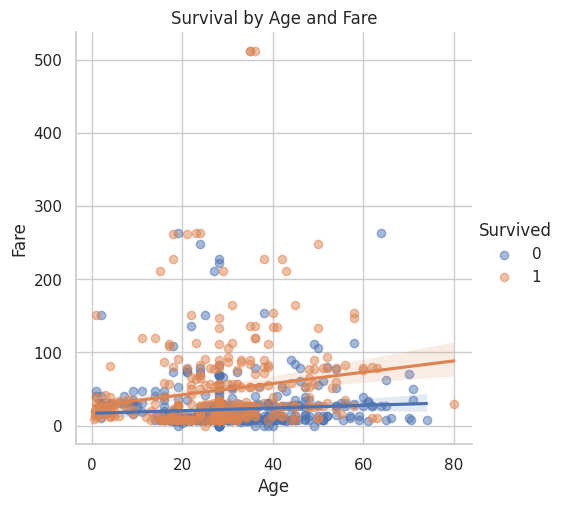

In [161]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, scatter_kws={'alpha':0.5})
plt.title('Survival by Age and Fare')
plt.show()

### Point Plot

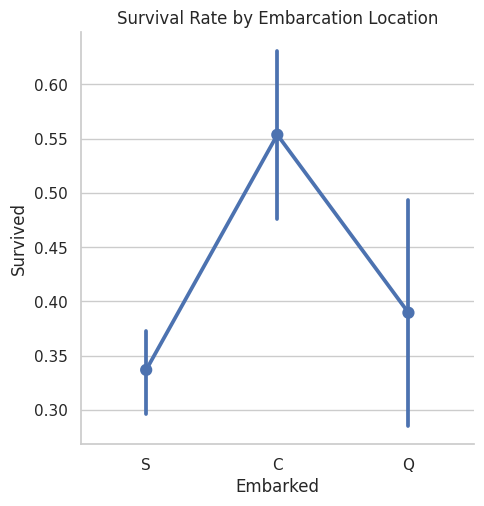

In [162]:
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')
plt.title('Survival Rate by Embarcation Location')
plt.show()

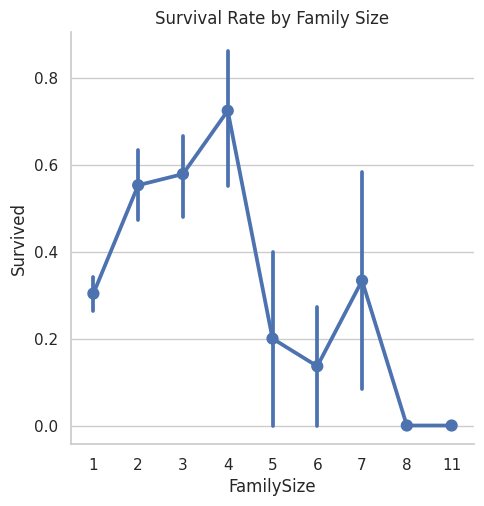

In [163]:
sns.catplot(x='FamilySize', y='Survived', data=df, kind='point')
plt.title('Survival Rate by Family Size')
plt.show()

### Pair Plot

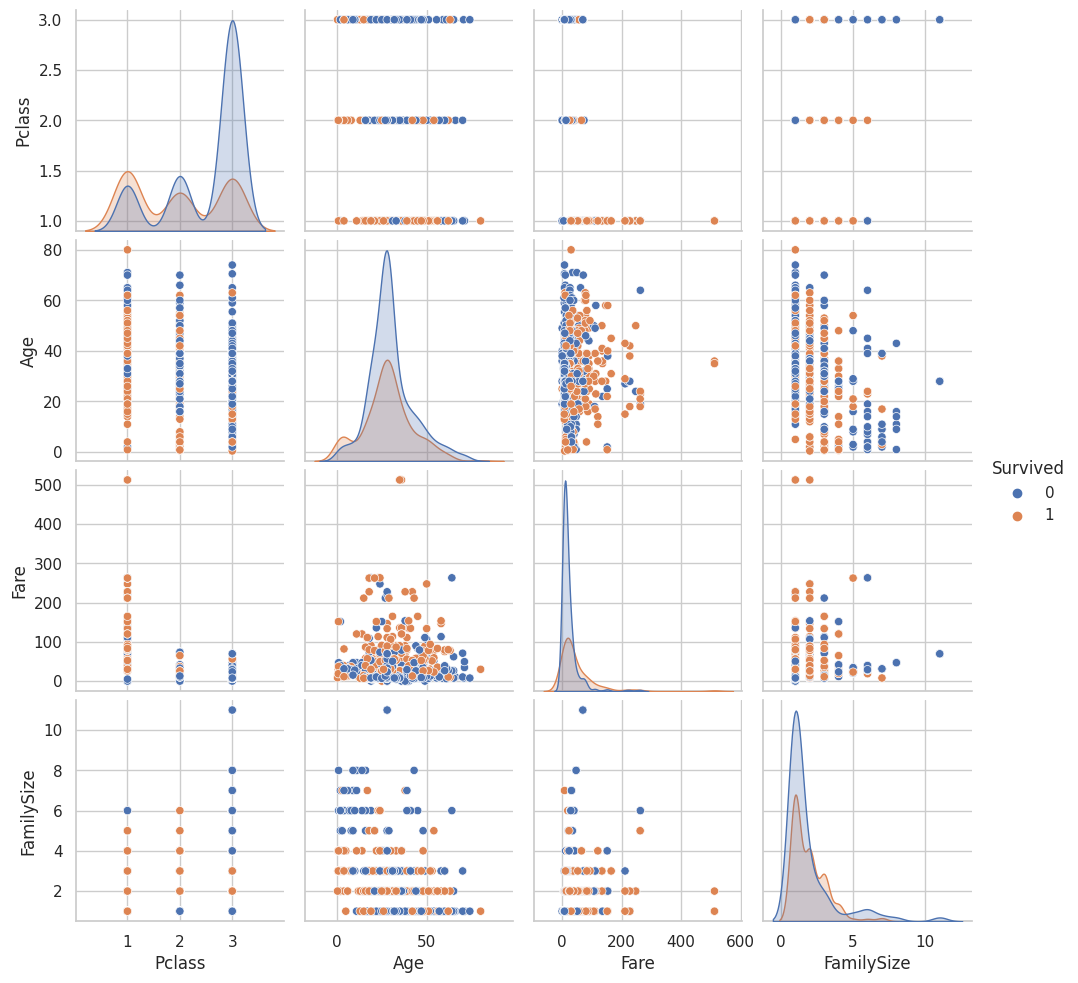

In [164]:
sns.pairplot(df, hue='Survived', height=2.5)
plt.show()

### Pie Charts

In [165]:
survival_counts = df.groupby(['Embarked', 'Survived']).size().reset_index(name='count')

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]])

for i, embark in enumerate(['C', 'Q', 'S']):
    data = survival_counts[survival_counts['Embarked'] == embark]
    fig.add_trace(px.pie(data, names='Survived', values='count').update_traces(hole=0.5).data[0], row=1, col=i+1)

fig.update_layout(title='Survival by Embarkation Location', legend_title_text='Survived',
                annotations=[{'text': 'Embarked C', 'x': 0.12, 'y': 0.5, 'showarrow': False},
                            {'text': 'Embarked Q', 'x': 0.5, 'y': 0.5, 'showarrow': False},
                            {'text': 'Embarked S', 'x': 0.88, 'y': 0.5, 'showarrow': False}])
fig.show()

### Density Heat Map

In [166]:
fig = px.density_heatmap(df, x="Embarked", y="Pclass", height=500, width=500)
fig.update_yaxes(categoryorder='array', categoryarray=[1, 2, 3], dtick=1, title_text='Passenger Class')
fig.update_layout(title_text='Passenger Class and Embarked Location')
fig.show()